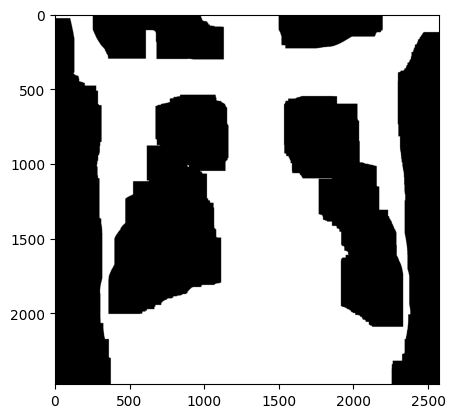

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/NORMAL-1003233-0001.jpeg')
original_img = img.copy()

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


# Threshold the image to get a binary image
ret, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)


# # Apply adaptive thresholding for better edge detection in varying lighting conditions
# thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological transformations to enhance contours
kernel = np.ones((205, 205), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)  # Dilation to strengthen contours
thresh = cv2.erode(thresh, kernel, iterations=1)   # Erosion to remove small noise

plt.imshow(thresh, cmap='gray')
plt.show()
# Invert the image (reverse white and black)
thresh = cv2.bitwise_not(thresh)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Create variables to store the minimum and maximum coordinates
min_x, min_y = float('inf'), float('inf')
max_x, max_y = -float('inf'), -float('inf')

# # Loop through all contours and measure their size
# for contour in contours:

#     original_img_copy = original_img.copy()
#     cv2.drawContours(original_img_copy, [contour], -1, (0, 255, 0), 3)
#     plt.imshow(cv2.cvtColor(original_img_copy, cv2.COLOR_BGR2RGB))
#     plt.show()

#     # Get the area of the contour
#     area = cv2.contourArea(contour)

#     # Get the bounding box of the contour
#     x, y, w, h = cv2.boundingRect(contour)

#     # # Display the contour area and bounding box size
#     print(f"Contour Area: {area} pixels")
#     print(f"Bounding Box: Width = {w}, Height = {h}")




#     if area > 100000 and area < 1000000 :
#         #Display the bounding rect
#         original_img_copy = original_img.copy()
#         cv2.rectangle(original_img_copy, (x, y), (x + w, y + h), (0, 255, 0), 5)
#         plt.imshow(cv2.cvtColor(original_img_copy, cv2.COLOR_BGR2RGB))
#         plt.show()
#         # print(f"Contour Area: {area} pixels")
#         # print(f"Bounding Box: Width = {w}, Height = {h}")
#         ratio = w/h
#         if ratio > 0.4 and ratio <0.6:
#           # Calculate the min and max coordinates for the overall bounding box
#             min_x = min(min_x, x)
#             min_y = min(min_y, y)
#             max_x = max(max_x, x + w)
#             max_y = max(max_y, y + h)

# # Draw a large bounding box that encompasses all the smaller ones
# cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

# # Display the thresholded image
# plt.imshow(thresh, cmap='gray')
# plt.title("Thresholded Image")
# plt.show()

# # Display the original image with contours and bounding boxes
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title("Image with Contours and Bounding Boxes")
# plt.show()

# # Crop the original image using the bounding box coordinates
# cropped_img = original_img[min_y:max_y, min_x:max_x]

# # Display the cropped image
# plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
# plt.title("Cropped Image with Merged Bounding Box")
# plt.show()


In [ ]:
# get data using curl
!curl https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e9a18c27-67da-40a2-8f48-1c12f03de39d -o data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8050M  100 8050M    0     0  23.8M      0  0:05:37  0:05:37 --:--:-- 25.0M


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: CellData/OCT/train/DME/DME-778975-125.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-8457431-23.jpeg  
  inflating: CellData/OCT/train/DME/DME-3304080-55.jpeg  
  inflating: CellData/OCT/train/DME/DME-5006393-70.jpeg  
  inflating: CellData/OCT/train/DME/DME-5091309-15.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-181.jpeg  
  inflating: CellData/OCT/train/DME/DME-8525575-184.jpeg  
  inflating: CellData/OCT/train/DME/DME-5143281-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-6737988-35.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-202.jpeg  
  inflating: CellData/OCT/train/DME/DME-3531101-20.jpeg  
  inflating: CellData/OCT/train/DME/DME-3157783-58.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-41.jpeg  
  inflating: CellData/OCT/train/DME/DME-30521-85.jpeg  
  inflating: CellData/OCT/train/DME/DME-5489583-15.jpeg  
  inflating: CellData/

Processing image: NORMAL-8373157-0001.jpeg


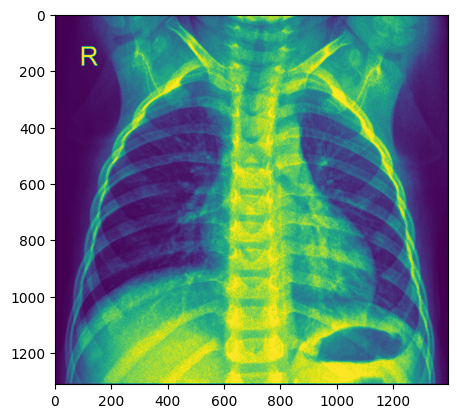

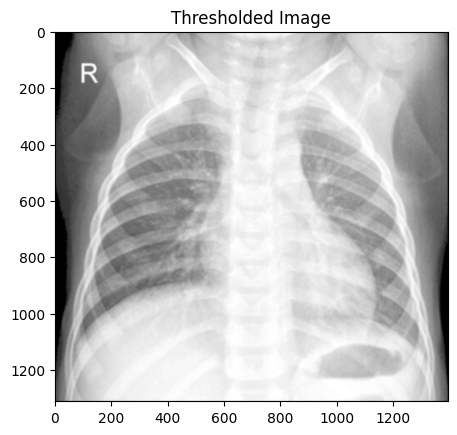

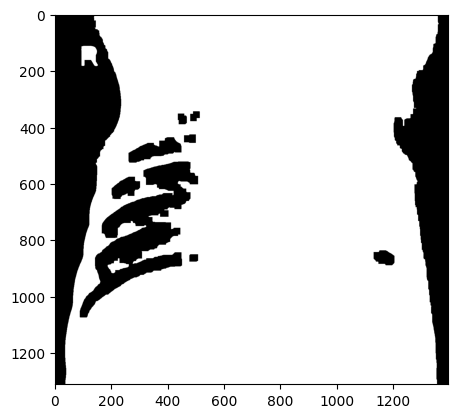

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import numpy as np

def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Function to process a single image
def process_image(image_path, output_dir=""):
    # Load the image
    img = cv2.imread(image_path)
    original_img = img.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gamma = 0.3  # Values > 1 will decrease brightness
    adjusted = adjust_gamma(gray, gamma=gamma)

    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 0     # Brightness control (0-100)

    adjusted = cv2.convertScaleAbs(adjusted, alpha=alpha, beta=beta)
    plt.imshow(adjusted)
    plt.show()

    gamma = 2  # Values > 1 will decrease brightness
    adjusted = adjust_gamma(adjusted, gamma=gamma)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(adjusted, (11, 11), 0)

    gamma = 2  # Values > 1 will decrease brightness
    blurred = adjust_gamma(blurred, gamma=gamma)

    # Display the thresholded image
    plt.imshow(blurred, cmap='gray')
    plt.title("Thresholded Image")
    plt.show()

    # Threshold the image to get a binary image
    ret, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

    # Apply morphological transformations to enhance contours
    kernel = np.ones((23, 23), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=1)  # Dilation to strengthen contours
    thresh = cv2.erode(thresh, kernel, iterations=1)   # Erosion to remove small noise

    plt.imshow(thresh, cmap='gray')
    plt.show()

    # Invert the image (reverse white and black)
    thresh = cv2.bitwise_not(thresh)

    # Find contours in the thresholded image
    # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # # Create variables to store the minimum and maximum coordinates
    # min_x, min_y = float('inf'), float('inf')
    # max_x, max_y = -float('inf'), -float('inf')

    # # Loop through all contours and measure their size
    # for contour in contours:
    #     # Get the area of the contour
    #     area = cv2.contourArea(contour)

    #     # Get the bounding box of the contour
    #     x, y, w, h = cv2.boundingRect(contour)

    #     # Check if area is within the specified range
    #     if area > 600000 and area < 1000000:
    #         ratio = w / h
    #         if ratio > 0.4 and ratio < 0.6:
    #             # Calculate the min and max coordinates for the overall bounding box
    #             min_x = min(min_x, x)
    #             min_y = min(min_y, y)
    #             max_x = max(max_x, x + w)
    #             max_y = max(max_y, y + h)

    # # Draw a large bounding box that encompasses all the smaller ones
    # cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

    # # Crop the original image using the bounding box coordinates
    # cropped_img = original_img[min_y:max_y, min_x:max_x]

    # # Display the cropped image
    # plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    # plt.title(f"Cropped Image: {os.path.basename(image_path)}")
    # plt.show()

    # # Save the cropped image to the specified output directory
    # output_path = os.path.join(output_dir, os.path.basename(image_path))
    # cv2.imwrite(output_path, cropped_img)


# Function to process all images in a folder
def process_all_images_in_folder(input_folder, output_folder=""):
    # Check if output directory exists, if not, create it
    # if not os.path.exists(output_folder):
    #     os.makedirs(output_folder)

    # List all files in the input folder
    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)

        # Check if the file is an image (you can add more file extensions if needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Processing image: {file_name}")
            process_image(file_path, output_folder)
        break

# Specify the input and output folders
input_folder = '/content/CellData/chest_xray/train/NORMAL/'  # Change to your input folder path
output_folder = ''  # Change to your output folder path

# Process all images in the input folder
process_all_images_in_folder(input_folder, output_folder)


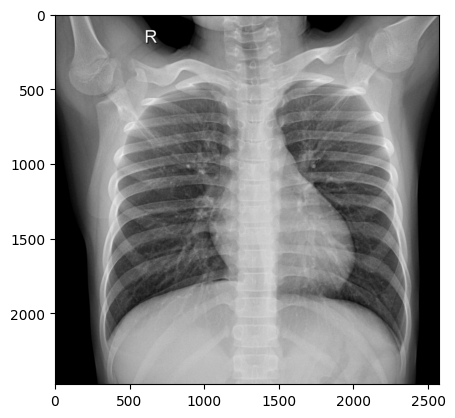

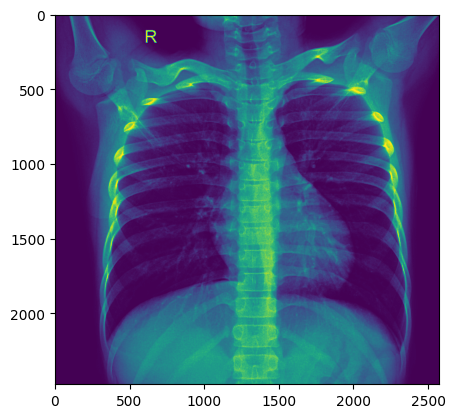

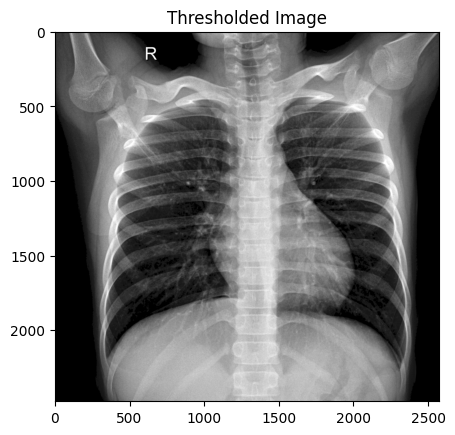

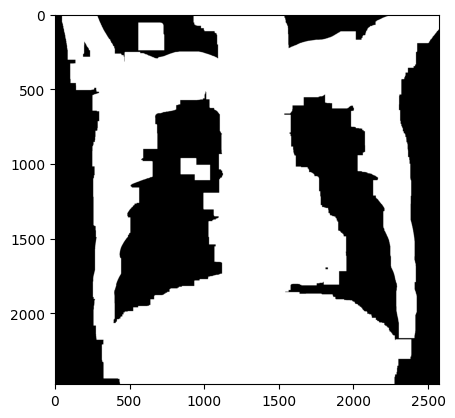

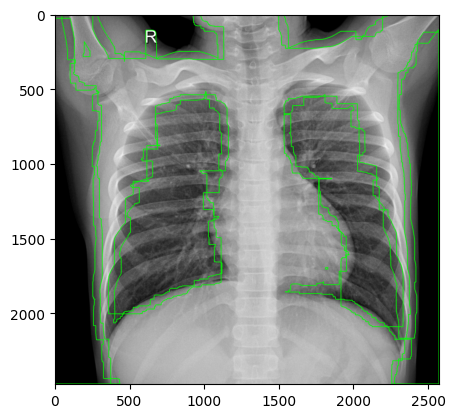

In [ ]:
import cv2
import numpy as np

def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

image = cv2.imread('/content/NORMAL-1003233-0001.jpeg')
gamma = 0.3  # Values > 1 will decrease brightness
# convert to gray
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray' )
plt.show()

adjusted = adjust_gamma(image, gamma=gamma)

alpha = 1.5  # Contrast control (1.0-3.0)
beta = 0     # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(adjusted, alpha=alpha, beta=beta)
plt.imshow(adjusted)
plt.show()

gamma = 2  # Values > 1 will decrease brightness
blurred = adjust_gamma(adjusted, gamma=gamma)

# Display the thresholded image
plt.imshow(blurred, cmap='gray')
plt.title("Thresholded Image")
plt.show()

# Threshold the image to get a binary image
ret, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

# Apply morphological transformations to enhance contours
kernel = np.ones((103, 103), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)  # Dilation to strengthen contours
# thresh = cv2.erode(thresh, kernel, iterations=1)   # Erosion to remove small noise

plt.imshow(thresh, cmap='gray')
plt.show()

# Invert the image (reverse white and black)
thresh = cv2.bitwise_not(thresh)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

for contour in contours:
    # Get the area of the contour
    area = cv2.contourArea(contour)

    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)
    print(f"Contour Area: {area} pixels")
    print(f"Bounding Box: Width = {w}, Height = {h}")
    ratio = w/h
    original_img_copy = original_img.copy()